In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import pearsonr
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
                               
# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 10,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True,
    'text.latex.preamble': [r"\usepackage{bm}", r"\usepackage{mathtools}"]}
    # tell matplotlib about your params

rcParams.update(params)
# set nice figure sizes
fig_width_pt = 510    # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [fig_width, 0.5*fig_height]
rcParams.update({'figure.figsize': fig_size})

/home/lucasb/anaconda3/envs/TCR/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


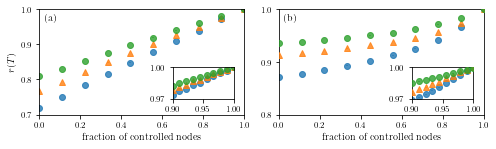

In [59]:
WS_K01 = np.loadtxt("WS_drivers_K01_output.csv")
WS_K015 = np.loadtxt("WS_drivers_K015_output.csv")
WS_K02 = np.loadtxt("WS_drivers_K02_output.csv")
WS_K01_zoom = np.loadtxt("WS_drivers_K01_zoom_output.csv")
WS_K015_zoom = np.loadtxt("WS_drivers_K015_zoom_output.csv")
WS_K02_zoom = np.loadtxt("WS_drivers_K02_zoom_output.csv")

ER_K01 = np.loadtxt("ER_drivers_K01_output.csv")
ER_K015 = np.loadtxt("ER_drivers_K015_output.csv")
ER_K02 = np.loadtxt("ER_drivers_K02_output.csv")
ER_K01_zoom = np.loadtxt("ER_drivers_K01_zoom_output.csv")
ER_K015_zoom = np.loadtxt("ER_drivers_K015_zoom_output.csv")
ER_K02_zoom = np.loadtxt("ER_drivers_K02_zoom_output.csv")

fractions = np.linspace(0,1,10)
fractions_zoom = np.linspace(0.9,1,10)

fig, ax = plt.subplots(ncols = 2)

axin01 = ax[0].inset_axes([0.65, 0.15, 0.3, 0.3])
ax[0].text(0.02*1,0.89*(1.0-0.7)+0.7,r"(a)")
ax[0].errorbar(fractions,ER_K01[:,0],yerr=ER_K01[:,1]/np.sqrt(1000),fmt='o',alpha=0.8)
axin01.errorbar(fractions_zoom,ER_K01_zoom[:,0],yerr=ER_K01_zoom[:,1]/np.sqrt(1000),fmt='o',alpha=0.8)
ax[0].errorbar(fractions,ER_K015[:,0],yerr=ER_K015[:,1]/np.sqrt(1000),fmt='^',alpha=0.8)
axin01.errorbar(fractions_zoom,ER_K015_zoom[:,0],yerr=ER_K015_zoom[:,1]/np.sqrt(1000),fmt='^',alpha=0.8)
ax[0].errorbar(fractions,ER_K02[:,0],yerr=ER_K02[:,1]/np.sqrt(1000),fmt='o',alpha=0.8)
axin01.errorbar(fractions_zoom,ER_K02_zoom[:,0],yerr=ER_K02_zoom[:,1]/np.sqrt(1000),fmt='o',alpha=0.8)
ax[0].set_ylim(0.7,1)
ax[0].set_xlim(0,1)
axin01.set_xlim(0.9,1.0)
axin01.set_ylim(0.97,1)
axin01.set_yticks([0.97,1.0])
ax[0].set_xlabel(r"fraction of controlled nodes")
ax[0].set_ylabel(r"$r(T)$")

axin11 = ax[1].inset_axes([0.65, 0.15, 0.3, 0.3])
ax[1].text(0.02*1,0.89*(1.0-0.8)+0.8,r"(b)")
ax[1].errorbar(fractions,WS_K01[:,0],yerr=WS_K01[:,1]/np.sqrt(1000),fmt='o',alpha=0.8,zorder=0,label=r"$K=0.1K^\ast$")
axin11.errorbar(fractions_zoom,WS_K01_zoom[:,0],yerr=WS_K01_zoom[:,1]/np.sqrt(1000),fmt='o',alpha=0.8,zorder=0)
ax[1].errorbar(fractions,WS_K015[:,0],yerr=WS_K015[:,1]/np.sqrt(1000),fmt='^',alpha=0.8,zorder=10,label=r"$K=0.15K^\ast$")
axin11.errorbar(fractions_zoom,WS_K015_zoom[:,0],yerr=WS_K015_zoom[:,1]/np.sqrt(1000),fmt='^',alpha=0.8,zorder=10)
ax[1].errorbar(fractions,WS_K02[:,0],yerr=WS_K02[:,1]/np.sqrt(1000),fmt='o',alpha=0.8,zorder=20,label=r"$K=0.2K^\ast$")
axin11.errorbar(fractions_zoom,WS_K02_zoom[:,0],yerr=WS_K02_zoom[:,1]/np.sqrt(1000),fmt='o',alpha=0.8,zorder=20)
ax[1].set_ylim(0.8,1)
ax[1].set_yticks([0.8,0.9,1.0])
ax[1].set_xlim(0,1)
axin11.set_xlim(0.9,1.0)
axin11.set_ylim(0.97,1)
axin11.set_yticks([0.97,1.0])
#ax[1].legend(loc=3,frameon=False,fontsize=6)
ax[1].set_xlabel(r"fraction of controlled nodes")

plt.tight_layout()
plt.rcParams['savefig.facecolor']='white'
plt.savefig('driver_nodes_kuramoto.png', dpi = 480)
plt.show()